In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
training_data = pd.read_parquet('C:/Users/nguye/Downloads/BTCUSDT/')
labels = pd.read_parquet('C:/Users/nguye/Downloads/LABEL_BTCUSDT/')
labels.drop(columns="SYMBOL", inplace=True)
join_data = training_data.join(labels, how='left')
training_data.index = pd.to_datetime(training_data.index, unit='ms')
labels.index = pd.to_datetime(labels.index, unit='ms')

In [3]:
full_data = training_data.join(labels, how='left')
# labeled_data = training_data.join(labels, how='right')
lb = training_data.join(labels)
lb.dropna(inplace=True)


In [4]:
x = training_data.head(24).copy()
# Chọn 12 dòng liên tiếp, tính trung bình
avg_row_per12 = x.rolling(12).mean().dropna()
avg_row_per12

# Chuyển đổi index thành đối tượng datetime
x.index = pd.to_datetime(x.index, unit='ms')
x.reset_index(inplace=True)
avg_12 = x.groupby(x.index//12).mean(numeric_only=False)
avg_12
# x


,OPEN_TIME,OPEN,HIGH,LOW,CLOSE,VOLUME,QUOTE_ASSET_VOLUME,NUMBER_OF_TRADES,TAKER_BUY_BASE_ASSET_VOLUME,TAKER_BUY_QUOTE_ASSET_VOLUME,YEAR_AND_MONTH
0,2017-08-17 04:27:30,4280.200833,4287.457500,4276.355000,4282.931667,3.931751,16863.844866,14.25,2.930042,12579.373162,201708.0
1,2017-08-17 05:27:30,4313.718333,4315.438333,4308.269167,4310.644167,1.936243,8358.735297,8.50,1.787339,7717.356644,201708.0


<Axes: xlabel='OPEN_TIME'>

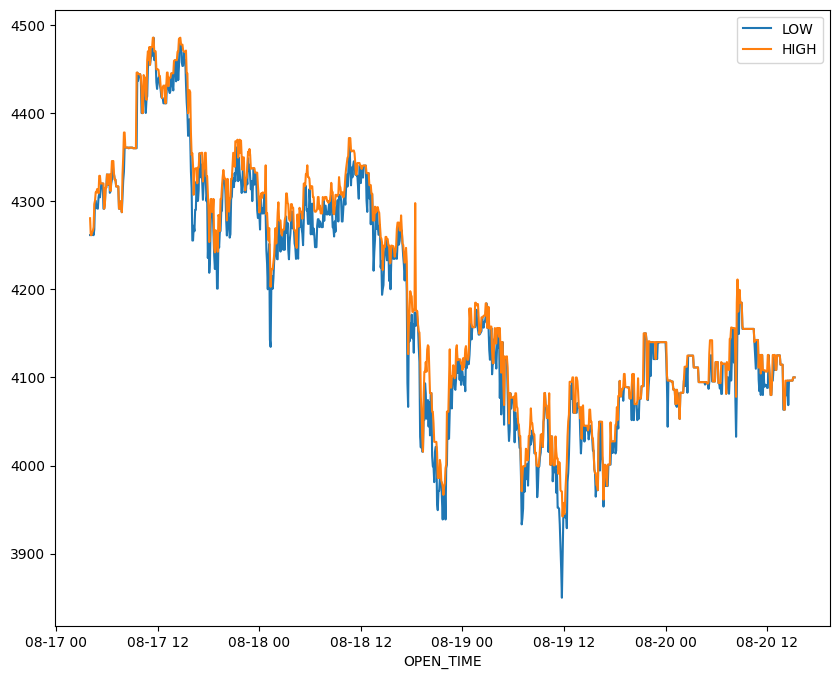

In [5]:
sample = training_data.head(1000).copy()
sample.index = pd.to_datetime(sample.index, unit='ms')
plt.figure(figsize=(10, 8))
sns.lineplot(data=sample[['LOW', 'HIGH']], dashes=False)


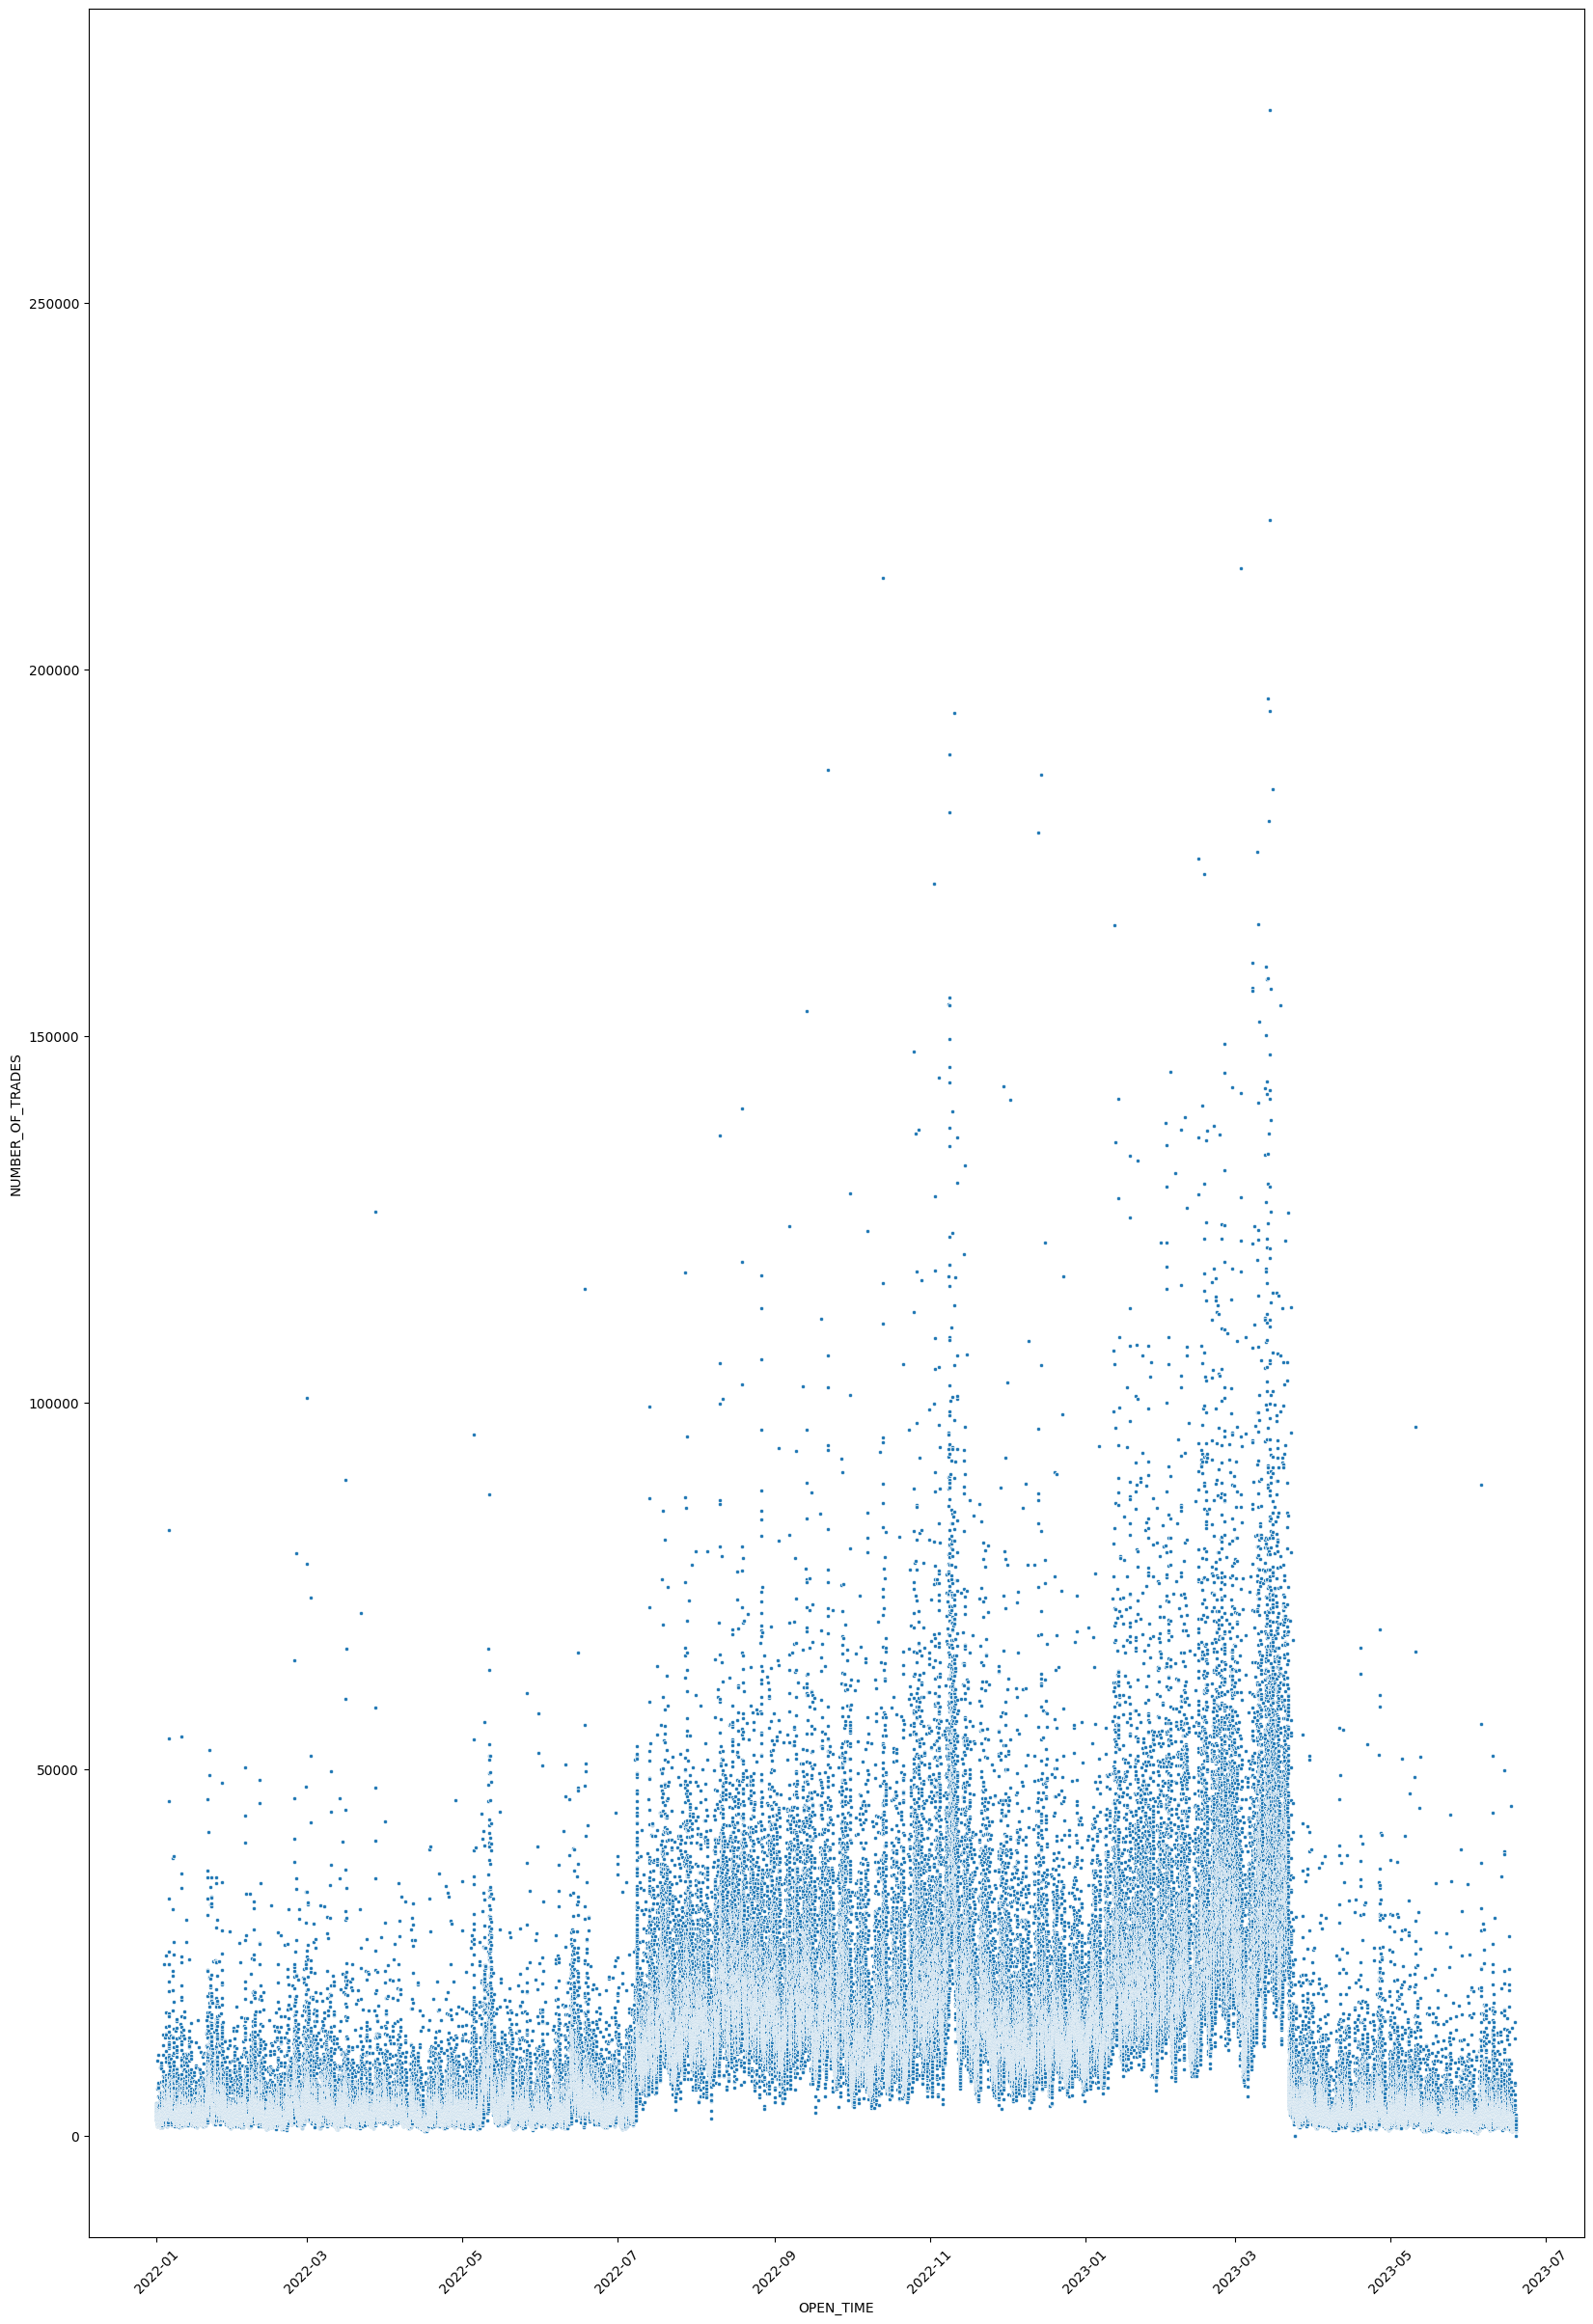

In [6]:

# training_data
plt.figure(figsize=(20, 30))
sns.scatterplot(data= training_data[training_data.index > '2022-01-01'], x = 'OPEN_TIME', y ='NUMBER_OF_TRADES',marker='.')
plt.xticks(rotation=45)
plt.savefig('C:/Users/nguye/Downloads/number_of_trades.png')
plt.show()

In [7]:
full_data['RETURN_RATE'] = (full_data['CLOSE'] - full_data['OPEN']) / full_data['OPEN']

std_3_rows = full_data['CLOSE'].rolling(6).std()
std_20_rows = full_data['CLOSE'].rolling(20).std()
std_ratio = std_3_rows / std_20_rows
full_data['V'] = std_ratio

full_data[full_data['V'] == 0].count()

OPEN                            142
HIGH                            142
LOW                             142
CLOSE                           142
VOLUME                          142
QUOTE_ASSET_VOLUME              142
NUMBER_OF_TRADES                142
TAKER_BUY_BASE_ASSET_VOLUME     142
TAKER_BUY_QUOTE_ASSET_VOLUME    142
YEAR_AND_MONTH                  142
LABEL                             4
RETURN_RATE                     142
V                               142
dtype: int64

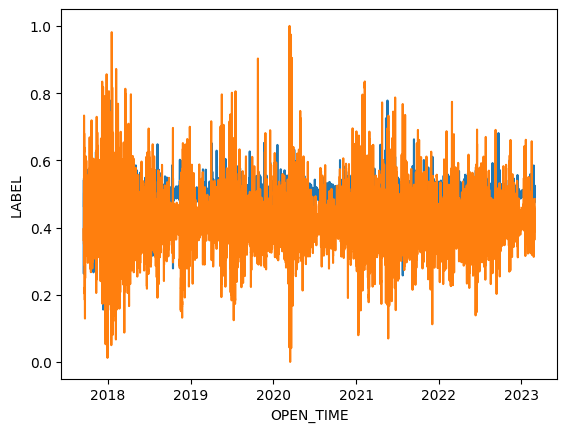

In [16]:
y = - full_data['RETURN_RATE'] / np.sqrt(full_data['V']) /2 *10 +0.5

sns.lineplot(data=y[lb.index])
# sns.regplot(x= y[lb.index], y= lb['LABEL'])
sns.lineplot(data=lb['LABEL'])
plt.show()


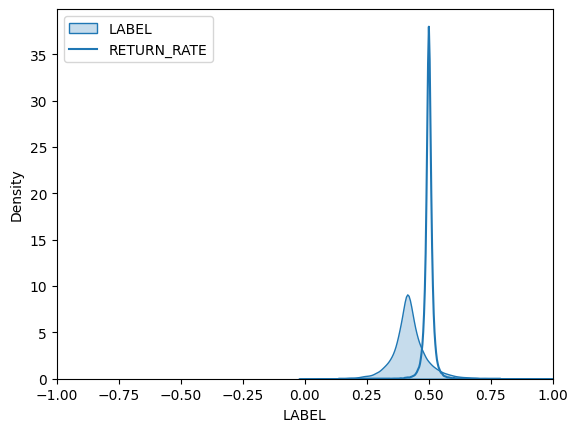

In [20]:
sns.kdeplot(data=lb['LABEL'],fill=True)
sns.kdeplot(data=y[lb.index])
plt.legend(['LABEL', 'RETURN_RATE'])
plt.xlim(-1, 1)
plt.show()

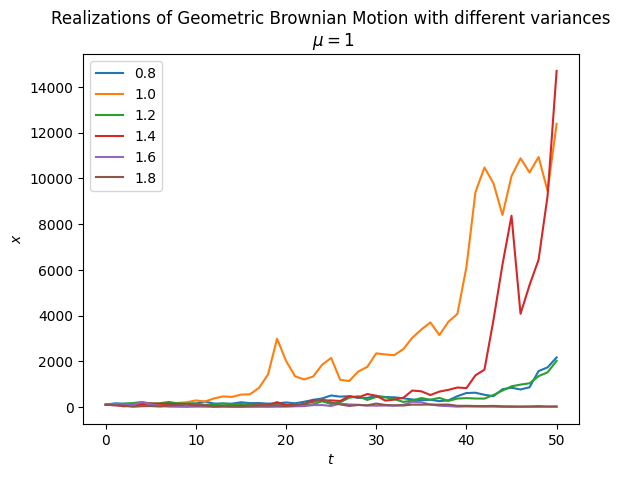

In [ ]:
mu = 1
n = 50
dt = 0.1
x0 = 100
np.random.seed(1)

sigma = np.arange(0.8, 2, 0.2)

x = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(len(sigma), n)).T
)
x = np.vstack([np.ones(len(sigma)), x])
x = x0 * x.cumprod(axis=0)

plt.plot(x)
plt.legend(np.round(sigma, 2))
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.title(
    "Realizations of Geometric Brownian Motion with different variances\n $\mu=1$"
)
plt.show()
